Last time we saw some integration methods for solving ODE's. Now, we will finalize these and look at a couple more examples to solidify our understanding. We'll look at the Runge-Kutta method of order $4$, also known as the $RK4$. Instead, we shall study this method directed towards the system as:

$$\theta''(t)+b\theta'(t)+c\sin(\theta(t))=0\tag{1}$$

Since $\omega(t)=\theta'(t)$, we get
$$\implies \omega'(t)=-b\omega(t)-c\sin(\theta(t))$$
and of course, we get this component wise by letting
$$y(t)=[\theta(t),\omega(t)]\implies y'=f(t,y)\implies f(t,y)=[y_2(t),-by_2(t)-c\sin(y_1(t))]$$

We fix $b$ and $c$ to be some values we like. Say $b=0.5, c=10$

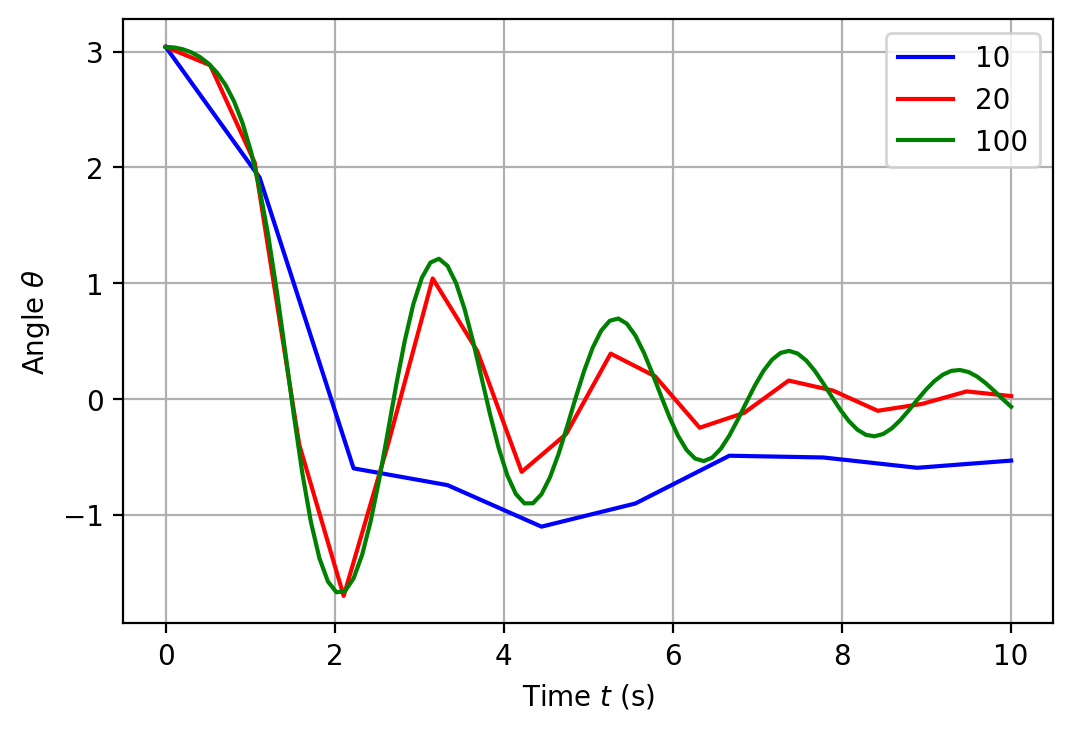

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def osc(y, t, b, c):
    return np.array([y[1], -b*y[1] - c*np.sin(y[0])])

b = 0.50
c = 10.0
y0 = np.array([np.pi - 0.1, 0.0])

t = np.linspace(0, 10, 101)

t = np.linspace(0, 10, 10)
sol = rk4(osc, y0, t, args=(b, c))
t1 = np.linspace(0, 10, 20)
sol1 = rk4(osc, y0, t1, args=(b, c))
t2 = np.linspace(0, 10, 100)
sol2 = rk4(osc, y0, t2, args=(b, c))

plt.figure(figsize=(6,4),dpi=200)
plt.plot(t, sol[:, 0], label='10',color='blue')
plt.plot(t1, sol1[:, 0], label='20',color='red')
plt.plot(t2, sol2[:, 0], label='100',color='green')
plt.legend(loc='best')
plt.xlabel(r'Time $t$ (s)')
plt.ylabel(r'Angle $\theta$')
plt.grid()

Of course, the more points we plot, the more accurate the solution path $\theta(t)$ becomes. $100$ increments should be enough for us.